In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_engine=pd.read_csv("C:\\Users\\ACER\\OneDrive\\Desktop\\luminar\\ml_project\\final\\datasets\\engine_health.csv")
df_engine

,Car_ID,Oil_Level,Oil_Quality_Score,Avg_Engine_Temp,Engine_Damage_Score,Overheat_Events,Km_Driven,Engine_Remaining_Years
0,1,12.760930,2.793797,96.362616,4.568834,5.0,163320.691493,7.903104
1,2,84.594315,6.402111,87.694283,1.601927,1.0,258912.238854,6.382996
2,3,60.688646,2.661412,82.829510,1.737058,5.0,134536.684294,8.909053
3,4,80.642562,4.285968,89.464558,0.404861,2.0,111531.610249,12.491033
4,5,98.459266,9.884569,103.453991,1.635450,1.0,242297.208424,6.987943
...,...,...,...,...,...,...,...,...
5995,5996,35.689288,NaN,70.464320,NaN,2.0,NaN,7.196273
5996,5997,81.342836,4.897431,89.197632,8.902551,2.0,108295.257214,7.473228
5997,5998,61.913578,2.703035,96.061572,2.691707,3.0,468164.103919,7.150632
5998,5999,94.289280,8.241786,91.180350,3.241332,4.0,140134.833800,8.783345


In [3]:
df_engine.shape

(6000, 8)

In [4]:
df_engine.head()


,Car_ID,Oil_Level,Oil_Quality_Score,Avg_Engine_Temp,Engine_Damage_Score,Overheat_Events,Km_Driven,Engine_Remaining_Years
0,1,12.760930,2.793797,96.362616,4.568834,5.0,163320.691493,7.903104
1,2,84.594315,6.402111,87.694283,1.601927,1.0,258912.238854,6.382996
2,3,60.688646,2.661412,82.829510,1.737058,5.0,134536.684294,8.909053
3,4,80.642562,4.285968,89.464558,0.404861,2.0,111531.610249,12.491033
4,5,98.459266,9.884569,103.453991,1.635450,1.0,242297.208424,6.987943


In [5]:
df_engine.tail()

,Car_ID,Oil_Level,Oil_Quality_Score,Avg_Engine_Temp,Engine_Damage_Score,Overheat_Events,Km_Driven,Engine_Remaining_Years
5995,5996,35.689288,NaN,70.464320,NaN,2.0,NaN,7.196273
5996,5997,81.342836,4.897431,89.197632,8.902551,2.0,108295.257214,7.473228
5997,5998,61.913578,2.703035,96.061572,2.691707,3.0,468164.103919,7.150632
5998,5999,94.289280,8.241786,91.180350,3.241332,4.0,140134.833800,8.783345
5999,6000,59.425202,2.148566,92.970583,8.410372,4.0,443071.706775,4.869800


In [6]:
df_engine.columns

Index(['Car_ID', 'Oil_Level', 'Oil_Quality_Score', 'Avg_Engine_Temp',
       'Engine_Damage_Score', 'Overheat_Events', 'Km_Driven',
       'Engine_Remaining_Years'],
      dtype='object')

In [7]:
df_engine.isna().sum()


Car_ID                      0
Oil_Level                 195
Oil_Quality_Score         459
Avg_Engine_Temp           550
Engine_Damage_Score       242
Overheat_Events           425
Km_Driven                 272
Engine_Remaining_Years      0
dtype: int64

In [8]:
df_engine.dtypes

Car_ID                      int64
Oil_Level                 float64
Oil_Quality_Score         float64
Avg_Engine_Temp           float64
Engine_Damage_Score       float64
Overheat_Events           float64
Km_Driven                 float64
Engine_Remaining_Years    float64
dtype: object

Text(0.5, 1.0, 'Engine Remaining Life Distribution')

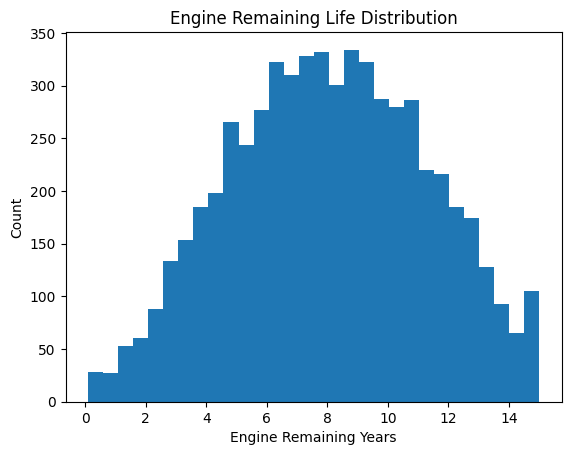

In [9]:
plt.hist(df_engine["Engine_Remaining_Years"], bins=30)
plt.xlabel("Engine Remaining Years")
plt.ylabel("Count")
plt.title("Engine Remaining Life Distribution")

In [10]:
df_engine["Engine_Remaining_Years"].describe()

count    6000.000000
mean        8.058559
std         3.235394
min         0.100000
25%         5.693077
50%         8.041286
75%        10.465488
max        15.000000
Name: Engine_Remaining_Years, dtype: float64

Text(0.5, 1.0, 'Km Driven vs Engine Remaining Life')

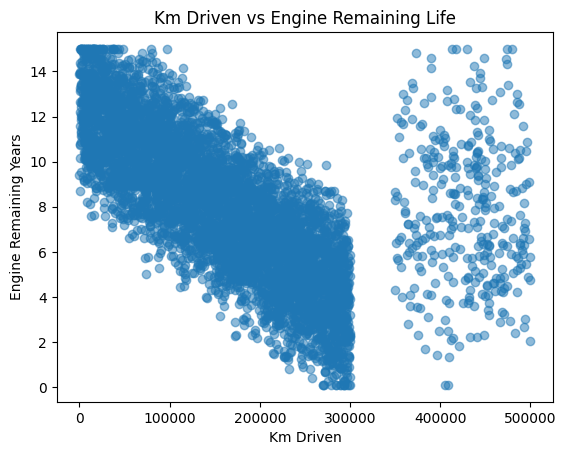

In [11]:
plt.scatter(df_engine["Km_Driven"], df_engine["Engine_Remaining_Years"], alpha=0.5)
plt.xlabel("Km Driven")
plt.ylabel("Engine Remaining Years")
plt.title("Km Driven vs Engine Remaining Life")

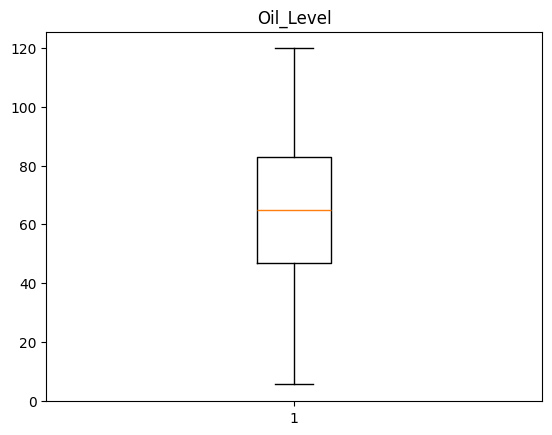

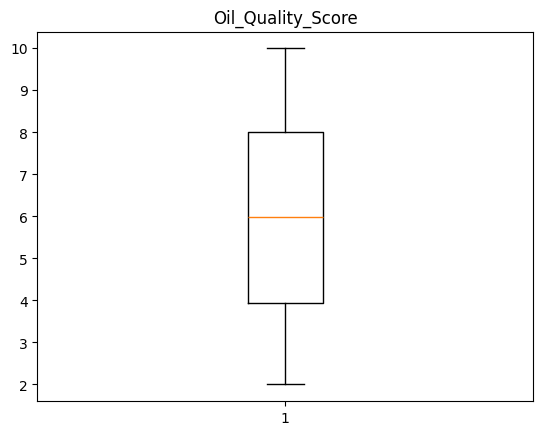

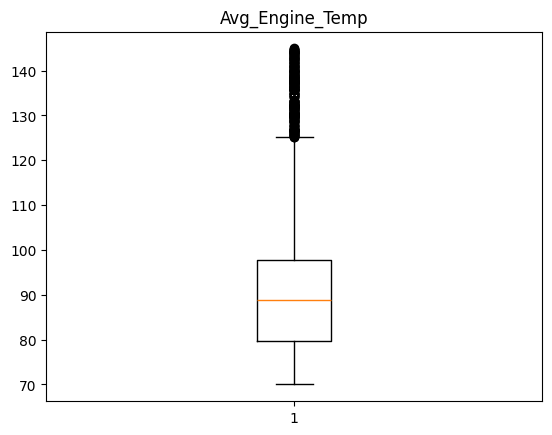

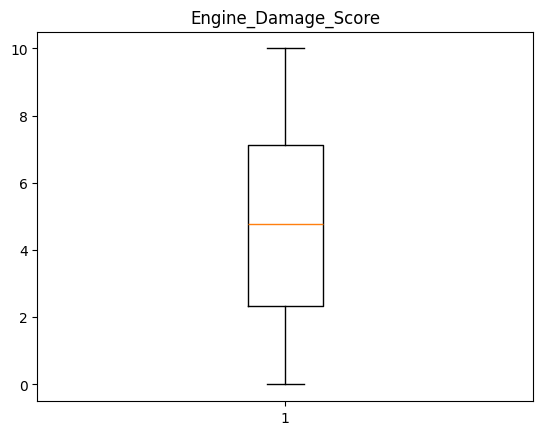

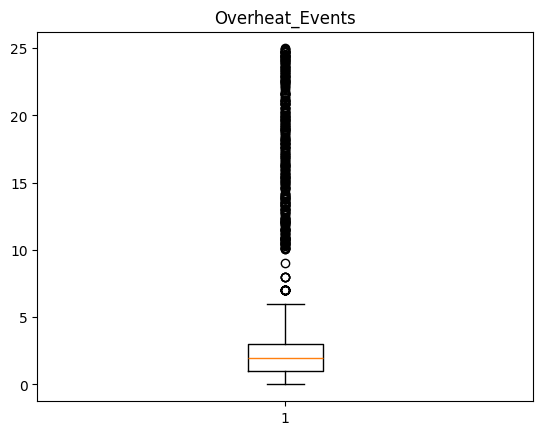

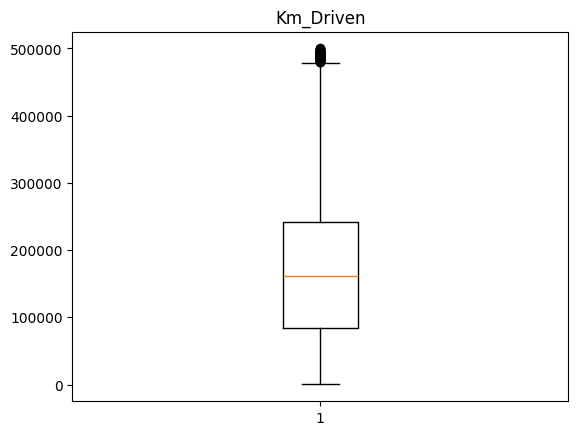

In [12]:
features = [
    "Oil_Level",
    "Oil_Quality_Score",
    "Avg_Engine_Temp",
    "Engine_Damage_Score",
    "Overheat_Events",
    "Km_Driven"
]

for col in features:
    plt.boxplot(df_engine[col].dropna())
    plt.title(col)
    plt.show()

In [13]:
feature_cols = [
    "Km_Driven",
    "Oil_Level",
    "Oil_Quality_Score",
    "Avg_Engine_Temp",
    "Engine_Damage_Score"
]
df_engine['Overheat_Events']=df_engine['Overheat_Events'].fillna(df_engine['Overheat_Events'].mode()[0])
for col in feature_cols:
    df_engine[col] = df_engine[col].fillna(df_engine[col].median())

In [14]:
df_engine.isna().sum()

Car_ID                    0
Oil_Level                 0
Oil_Quality_Score         0
Avg_Engine_Temp           0
Engine_Damage_Score       0
Overheat_Events           0
Km_Driven                 0
Engine_Remaining_Years    0
dtype: int64

In [15]:
x = df_engine.drop(columns=["Engine_Remaining_Years", "Car_ID"])
y = df_engine["Engine_Remaining_Years"]

In [16]:
for col in x.columns:
    lower = x[col].quantile(0.01)
    upper = x[col].quantile(0.99)
    x[col] = x[col].clip(lower, upper)


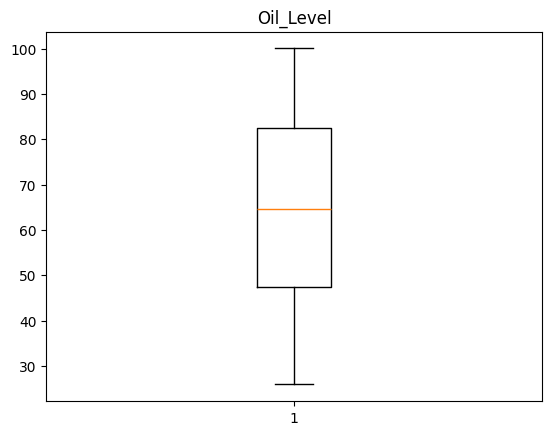

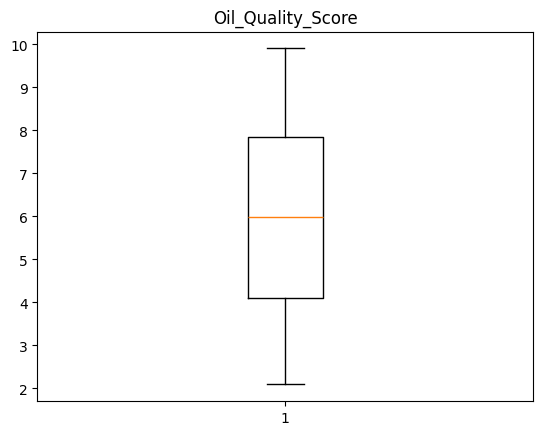

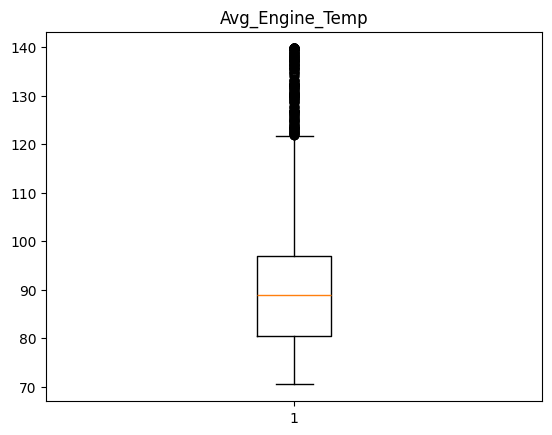

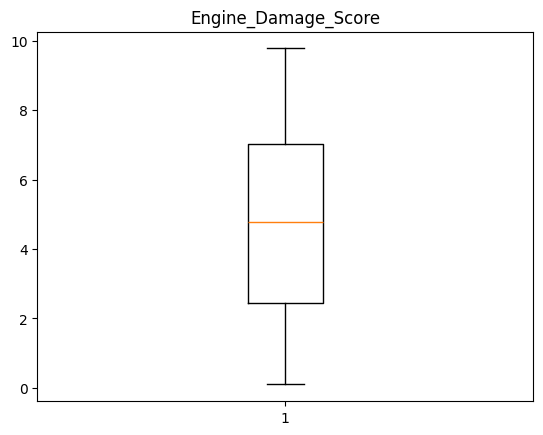

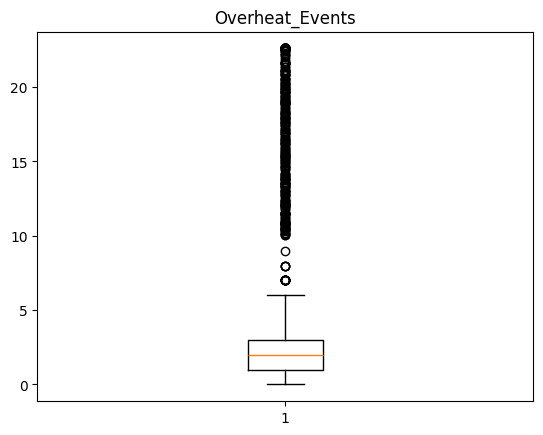

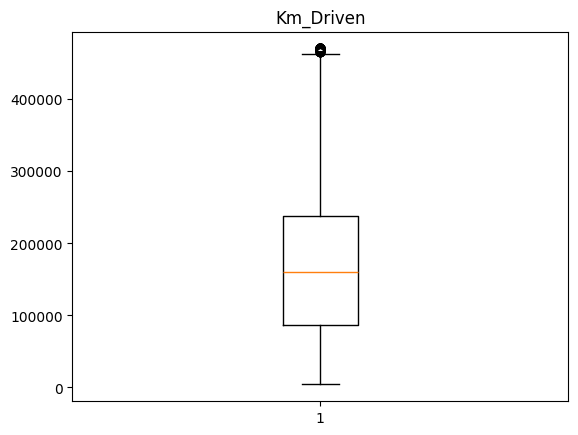

In [17]:

for col in features:
    plt.boxplot(x[col].dropna())
    plt.title(col)
    plt.show()

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.3,
    random_state=42
)


In [19]:

from sklearn.ensemble import RandomForestRegressor


model = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,         
    min_samples_leaf=8,    
    random_state=42
)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)


In [20]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE :", mae)
print("RMSE:", rmse)
print("R2  :", r2)


MAE : 1.018273261283678
RMSE: 1.4193589149782317
R2  : 0.8014202086908736


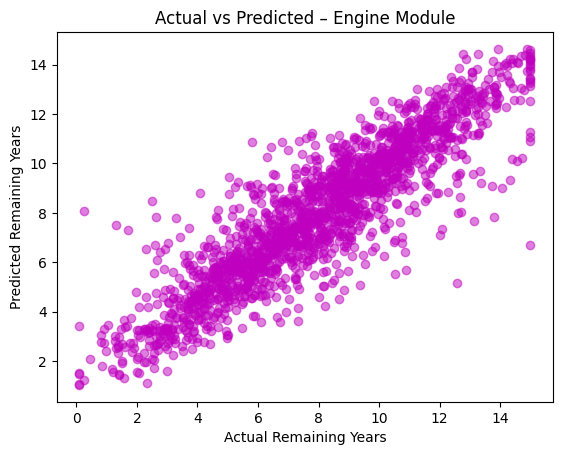

In [21]:
plt.scatter(y_test, y_pred, alpha=0.5, color='m')
plt.xlabel("Actual Remaining Years")
plt.ylabel("Predicted Remaining Years")
plt.title("Actual vs Predicted – Engine Module")
plt.show()


In [22]:
df_engine["Predicted_Engine_Remaining_Years"] = model.predict(
    df_engine.drop(columns=["Car_ID", "Engine_Remaining_Years"])
)


In [23]:
def engine_maintenance_status(years):
    if years < 2:
        return "Immediate Repair"
    elif years < 4:
        return "Service Soon"
    else:
        return "Healthy"

In [24]:
df_engine.loc[:, "Engine_Maintenance_Status"] = (
    df_engine["Predicted_Engine_Remaining_Years"]
    .apply(engine_maintenance_status)
)

In [25]:
df_engine[[
    "Car_ID",
    "Predicted_Engine_Remaining_Years",
    "Engine_Maintenance_Status"
]].head(10)

,Car_ID,Predicted_Engine_Remaining_Years,Engine_Maintenance_Status
0,1,7.094510,Healthy
1,2,6.691058,Healthy
2,3,9.548497,Healthy
3,4,11.901662,Healthy
4,5,7.436571,Healthy
5,6,11.885112,Healthy
6,7,7.827408,Healthy
7,8,3.939135,Service Soon
8,9,5.745283,Healthy
9,10,11.562071,Healthy


In [26]:
df_engine['Engine_Maintenance_Status'].value_counts()

Engine_Maintenance_Status
Healthy             5449
Service Soon         475
Immediate Repair      76
Name: count, dtype: int64

In [ ]:
import joblib

joblib.dump(model, "engine_model.pkl")
